# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [13]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 41.6 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [14]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd


In [15]:
headers = {
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}

sitio = requests.get('https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records', headers=headers)



print(sitio.status_code)

200


In [16]:
html = io.StringIO(sitio.text)

print(html)

In [18]:
tablas = pd.read_html(html)

print(tablas)

[                       Rank                    Song                 Artist(s)  \
0                         1       "Blinding Lights"                The Weeknd   
1                         2          "Shape of You"                Ed Sheeran   
2                         3               "Starboy"  The Weeknd and Daft Punk   
3                         4       "Sweater Weather"         The Neighbourhood   
4                         5     "Someone You Loved"             Lewis Capaldi   
..                      ...                     ...                       ...   
96                       97              "Payphone"  Maroon 5 and Wiz Khalifa   
97                       98      "Someone Like You"                     Adele   
98                       99            "Levitating"       Dua Lipa and DaBaby   
99                      100                  "Sad!"              XXXTentacion   
100  As of 19 December 2025  As of 19 December 2025    As of 19 December 2025   

         Streams (billions

In [19]:
ranking = tablas[0]

In [20]:
ranking.head()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.191,29 November 2019,[1]
1,2,"""Shape of You""",Ed Sheeran,4.690,6 January 2017,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.264,21 September 2016,[3]
3,4,"""Sweater Weather""",The Neighbourhood,4.256,3 December 2012,[4]
4,5,"""Someone You Loved""",Lewis Capaldi,4.167,8 November 2018,[5]


In [21]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Rank                101 non-null    object
 1   Song                101 non-null    object
 2   Artist(s)           101 non-null    object
 3   Streams (billions)  101 non-null    object
 4   Release date        101 non-null    object
 5   Ref.                99 non-null     object
dtypes: object(6)
memory usage: 4.9+ KB


In [25]:
ranking = ranking[ranking['Rank'] != 'As of 19 December 2025']

ranking.tail()

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
95,96,"""Sicko Mode""",Travis Scott and Drake,2.504,21 August 2018,[95]
96,97,"""Payphone""",Maroon 5 and Wiz Khalifa,2.483,16 April 2012,NaN
97,98,"""Someone Like You""",Adele,2.482,24 January 2011,NaN
98,99,"""Levitating""",Dua Lipa and DaBaby,2.476,1 October 2020,[96]
99,100,"""Sad!""",XXXTentacion,2.468,2 March 2018,[97]


In [26]:
ranking['Streams (billions)'] = ranking['Streams (billions)'].astype(float)

/tmp/ipykernel_2804/3424191835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['Streams (billions)'] = ranking['Streams (billions)'].astype(float)


In [27]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                100 non-null    object 
 1   Song                100 non-null    object 
 2   Artist(s)           100 non-null    object 
 3   Streams (billions)  100 non-null    float64
 4   Release date        100 non-null    object 
 5   Ref.                98 non-null     object 
dtypes: float64(1), object(5)
memory usage: 5.5+ KB


In [28]:
ranking['Release date'] = pd.to_datetime(ranking['Release date'],errors='coerce')

/tmp/ipykernel_2804/3248892211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking['Release date'] = pd.to_datetime(ranking['Release date'],errors='coerce')


In [29]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Rank                100 non-null    object        
 1   Song                100 non-null    object        
 2   Artist(s)           100 non-null    object        
 3   Streams (billions)  100 non-null    float64       
 4   Release date        100 non-null    datetime64[ns]
 5   Ref.                98 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.5+ KB


In [30]:
top10 = ranking.nlargest(10,'Streams (billions)')
top10

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,5.191,2019-11-29,[1]
1,2,"""Shape of You""",Ed Sheeran,4.690,2017-01-06,[2]
2,3,"""Starboy""",The Weeknd and Daft Punk,4.264,2016-09-21,[3]
3,4,"""Sweater Weather""",The Neighbourhood,4.256,2012-12-03,[4]
4,5,"""Someone You Loved""",Lewis Capaldi,4.167,2018-11-08,[5]
5,6,"""As It Was""",Harry Styles,4.161,2022-04-01,[6]
6,7,"""Sunflower""",Post Malone and Swae Lee,4.060,2018-10-18,[7]
7,8,"""One Dance""",Drake with Wizkid and Kyla,3.930,2016-04-05,[8]
8,9,"""Perfect""",Ed Sheeran,3.756,2017-03-03,[9]
9,10,"""Stay""",The Kid Laroi and Justin Bieber,3.750,2021-07-09,[10]


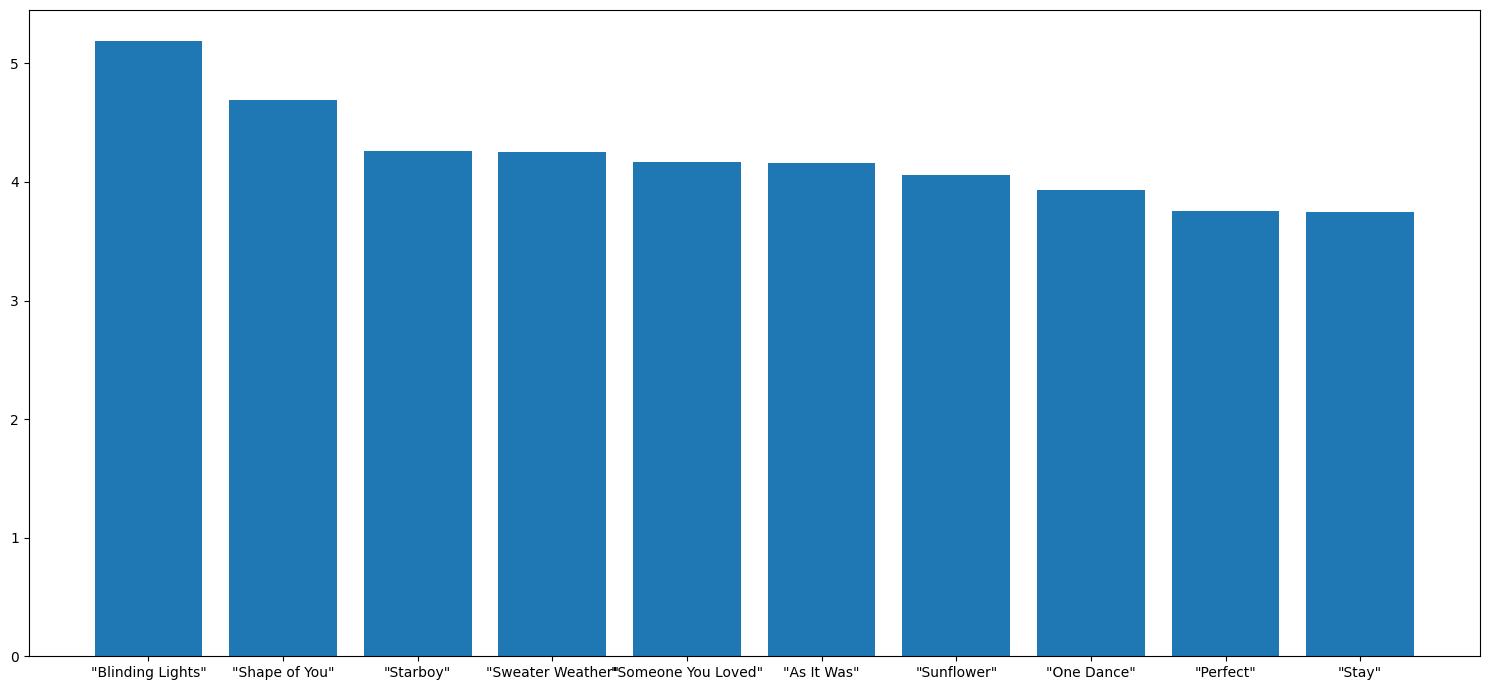

In [34]:
plt.figure(figsize=(15,7))
plt.bar(x=top10.Song,height=top10['Streams (billions)'])
plt.tight_layout()
plt.show()

In [37]:
conn = sqlite3.connect('canciones.db')
ranking.to_sql('mas_stremeadas',conn,if_exists='replace',index=False)

100

In [39]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM mas_stremeadas')
print(cursor.fetchone()[1])

"Blinding Lights"
